# **Storytelling Impact with Correlation**


In this notebook we'll analyse the impact of the **Average Storytelling Uniformity** on the **Brand's performance**. The target variable will be the evolution of **L'Occitane share price** on **Hong Kong financial exchange**. 

Machine Learning method used: **Simple Linear Regression**

**Resources:**
* https://plotly.com/python/ml-regression/
* https://github.com/hugotorche/IBMDataScience/blob/main/Course%209/%20ML%20with%20Python%20(02).ipynb

## **Libraries and Processing**

In [1]:
# Import necessary Libraries

# Dash 
%%capture 
!pip install dash
import dash_core_components as dcc

# Plotly 
import plotly
plotly.io.renderers.default = 'colab'
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp

# Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

# Pandas and Numpy 
import pandas as pd
import numpy as np
from functools import reduce
import pylab as pl

# Machine Learning 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans

In [189]:
# load dataset
sim_time = pd.read_csv('/content/drive/MyDrive/The Role of Storytelling in Brand Communication/9. Storytelling uniformity across Stakeholders/sim_time1.csv')
sim_time = sim_time.iloc[:,1:]

sim_time = sim_time[sim_time['date'] >= "2020-01"]
sim_time_vos = sim_time[sim_time['voices']=="Social"]
sim_time_voe = sim_time[sim_time['voices']=="Employees"]
sim_time_voc = sim_time[sim_time['voices']=="Customers"]
sim_time_vof = sim_time[sim_time['voices']=="Foundation"]

In [190]:
# set datetime
%%capture
sim_time_vos['date'] = pd.to_datetime(sim_time_vos['date'])
sim_time_voe['date'] = pd.to_datetime(sim_time_voe['date'])
sim_time_voc['date'] = pd.to_datetime(sim_time_voc['date'])
sim_time_vof['date'] = pd.to_datetime(sim_time_vof['date'])

In [191]:
# merge datasets
data_frames = [sim_time_vos,sim_time_voe,sim_time_voc,sim_time_vof]
sim_time_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), data_frames)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'voices_x', 'compound_x', 'similarities_x'} in the result is deprecated and will raise a MergeError in a future version.



In [192]:
# set columns
sim_time_merged.columns = ["rem1","date","social_sim","social_com","rem3","employees_sim","employees_com","rem4",
                           "customers_sim","customers_com","rem5","foundation_sim","foundation_com"]
sim_time_merged = sim_time_merged[sim_time_merged.columns.drop(list(sim_time_merged.filter(regex='rem')))]

In [193]:
# date scope
print("Start Date: ",sim_time_merged['date'].min())
print("End Date: ",sim_time_merged['date'].max())

Start Date:  2020-01-01 00:00:00
End Date:  2022-05-21 00:00:00


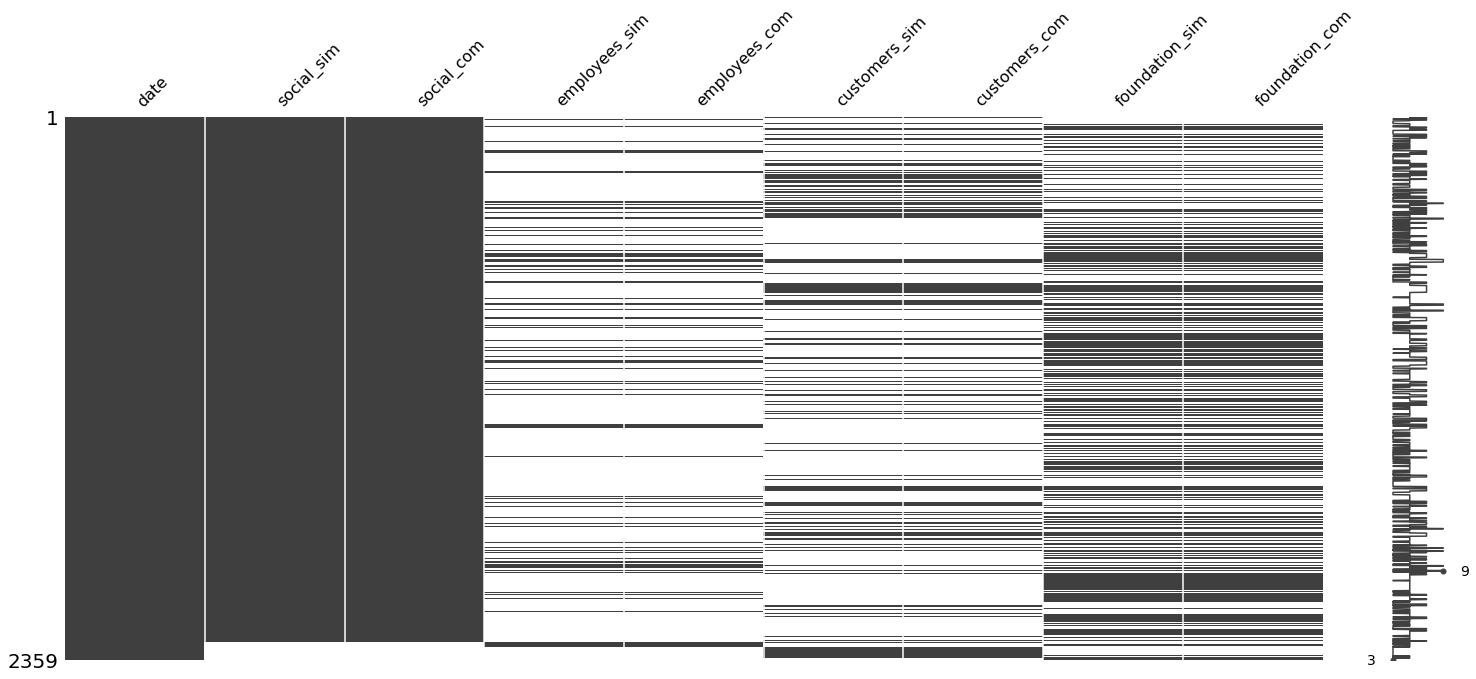

In [194]:
# check na
msno.matrix(sim_time_merged)

In [195]:
# fill na
sim_time_merged['social_sim'] = sim_time_merged['social_sim'].fillna(sim_time_merged['social_sim'].mean())
sim_time_merged['employees_sim'] = sim_time_merged['employees_sim'].fillna(sim_time_merged['employees_sim'].mean())
sim_time_merged['customers_sim'] = sim_time_merged['customers_sim'].fillna(sim_time_merged['customers_sim'].mean())
sim_time_merged['foundation_sim'] = sim_time_merged['foundation_sim'].fillna(sim_time_merged['foundation_sim'].mean())

sim_time_merged['social_com'] = sim_time_merged['social_com'].fillna(method='bfill').fillna(method='ffill')
sim_time_merged['employees_com'] = sim_time_merged['employees_com'].fillna(method='bfill').fillna(method='ffill')
sim_time_merged['customers_com'] = sim_time_merged['customers_com'].fillna(method='bfill').fillna(method='ffill')
sim_time_merged['foundation_com'] = sim_time_merged['foundation_com'].fillna(method='bfill').fillna(method='ffill')

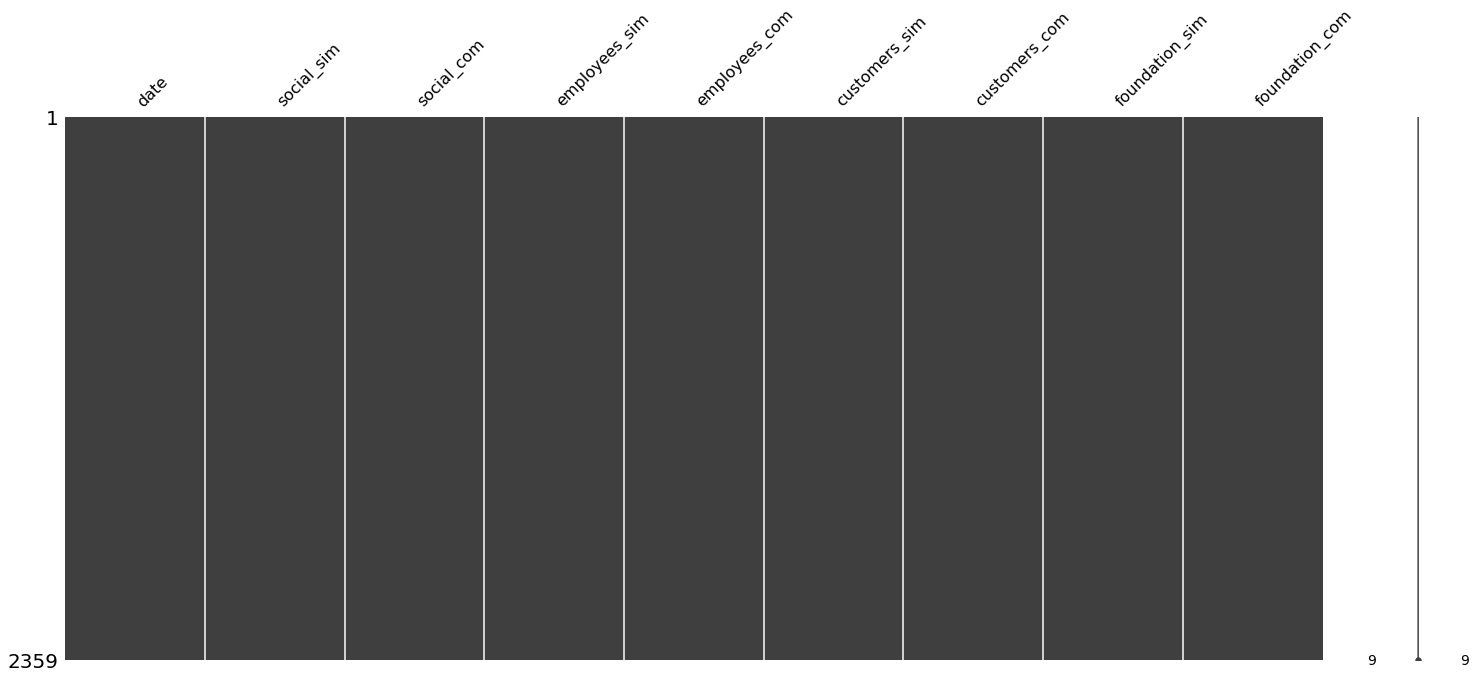

In [196]:
# check na
msno.matrix(sim_time_merged)

In [197]:
# load financial data
fi = pd.read_csv('/content/drive/MyDrive/The Role of Storytelling in Brand Communication/7. Voice of Finance/Historical Stock Data.csv')
fi.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-05-07,14.40,15.160000,13.80,14.34,13.310637,154060000
1,2010-05-10,15.08,15.760000,14.60,15.62,14.498755,85823940
2,2010-05-11,15.80,16.040001,15.12,15.48,14.368805,48075663
3,2010-05-12,15.56,15.660000,14.98,15.60,14.480192,24311500
4,2010-05-13,15.44,16.120001,15.40,15.98,14.832913,29554143


In [198]:
# change dataset
fi['Date'] = pd.to_datetime(fi['Date'])
# fi['Date'] = fi['Date'].dt.strftime('%Y-%m')
fi = fi.rename(columns={'Date':'date','Close':'share_price'})
fi = fi.groupby('date')['share_price'].mean()
fi = fi.reset_index().dropna()
fi = fi[fi['date'] > '2019-12-31']
fi.head()

,date,share_price
2382,2020-01-02,18.020000
2383,2020-01-03,18.160000
2384,2020-01-06,18.240000
2385,2020-01-07,19.340000
2386,2020-01-08,19.440001


In [199]:
# merge datasets
dffi = fi.merge(sim_time_merged, how = 'outer', on = 'date')
dffi = dffi.groupby('date').mean()
dffi = dffi.fillna(dffi.mean())
dffi.head()

,share_price,social_sim,social_com,employees_sim,employees_com,customers_sim,customers_com,foundation_sim,foundation_com
date,,,,,,,,,
2020-01-01,21.246956,0.886611,0.9153,0.789972,0.6249,0.952122,0.7650,0.928734,0.5719
2020-01-02,18.020000,0.706555,0.3612,0.789972,0.0000,0.952122,0.3502,0.928734,0.4404
2020-01-03,18.160000,0.875200,0.1806,0.789972,0.6249,0.952122,0.7650,0.928734,0.5719
2020-01-04,21.246956,0.950063,0.8481,0.789972,0.0000,0.952122,0.3502,0.928734,0.4404
2020-01-05,21.246956,0.824090,0.4158,0.789972,0.6249,0.952122,0.7650,0.928734,0.5719


In [200]:
# data info
dffi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 836 entries, 2020-01-01 to 2022-05-23
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   share_price     836 non-null    float64
 1   social_sim      836 non-null    float64
 2   social_com      836 non-null    float64
 3   employees_sim   836 non-null    float64
 4   employees_com   836 non-null    float64
 5   customers_sim   836 non-null    float64
 6   customers_com   836 non-null    float64
 7   foundation_sim  836 non-null    float64
 8   foundation_com  836 non-null    float64
dtypes: float64(9)
memory usage: 65.3 KB


## **Machine Learning**

In [207]:
# Loot at Feature Correlation with Linear Regression

# Define Dataset
df_lr = dffi.reset_index().drop('date',axis=1).dropna()

# Create Model
X = df_lr.drop(columns=['share_price'])
y = df_lr['share_price']
model = LinearRegression()
model.fit(X, y)

# Define colorq
colors = ['Positive' if c > 0 else 'Negative' for c in model.coef_]

# Create Bar Chart 
fig = px.bar(
    x=X.columns, y=model.coef_, color=colors,
    color_discrete_sequence=[px.colors.qualitative.Dark24[5],px.colors.qualitative.Dark24[10]],
    labels=dict(x='Feature', y='Linear coefficient'),
)

# Set Bar Chart properties
layout = go.Layout(
    title="Weight of each Voice sentiment/similarity for predicting Share Price",
    title_x=0.5,
    plot_bgcolor="#FFF",  # Sets background color to white
    xaxis=dict(
        title="Voices",
        linecolor="#BCCCDC",  # Sets color of X-axis line
        showgrid=False  # Removes X-axis grid lines
    ),
    yaxis=dict(
        title="Linear coefficient",  
        linecolor="#BCCCDC",  # Sets color of Y-axis line
        showgrid=False,  # Removes Y-axis grid lines    
    )
)

fig.update_layout(layout)

# Display Figure
fig.show()

In [202]:
# Ordinary Least Square (OLS) for uniformity

# Set x axis range
xmax, xmin = 0.95, 0.76

# Define Dataset
df_lr['uniformity'] = df_lr[['social_sim','employees_sim', 'customers_sim', 'foundation_sim']].mean(axis=1)
df_lr['sentiment'] = df_lr[['social_com','employees_com', 'customers_com', 'foundation_com']].mean(axis=1)
df_lr2 = df_lr[['uniformity','sentiment','share_price']]

# Create Scatter plot
fig = px.scatter(df_lr2, x='uniformity', y='share_price', trendline="ols", trendline_color_override='red', opacity=0.65)
fig.update_xaxes(range=[xmin, xmax])

# Set Bar Chart properties
layout = go.Layout(
    title="Regression plot of Uniformity and Share Price",
    title_x=0.5,
    plot_bgcolor="#FFF",  # Sets background color to white
    xaxis=dict(
        title="Uniformity",
        linecolor="#BCCCDC",  # Sets color of X-axis line
        showgrid=False  # Removes X-axis grid lines
    ),
    yaxis=dict(
        title="Share Price",  
        linecolor="#BCCCDC",  # Sets color of Y-axis line
        showgrid=False  # Removes Y-axis grid lines  
    )
)

fig.update_layout(layout)

# Display Figure
fig.show()

In [203]:
# Ordinary Least Square (OLS) for sentiment

# Set x axis range
xmax, xmin = 0.95, 0.76

# Create Scatter plot
fig = px.scatter(df_lr2, x='sentiment', y='share_price', trendline="ols", trendline_color_override='red', opacity=0.65)
#fig.update_xaxes(range=[xmin, xmax])

# Set Bar Chart properties
layout = go.Layout(
    title="Regression plot of Sentiment and Share Price",
    title_x=0.5,
    plot_bgcolor="#FFF",  # Sets background color to white
    xaxis=dict(
        title="Sentiment",
        linecolor="#BCCCDC",  # Sets color of X-axis line
        showgrid=False  # Removes X-axis grid lines
    ),
    yaxis=dict(
        title="Share Price",  
        linecolor="#BCCCDC",  # Sets color of Y-axis line
        showgrid=False  # Removes Y-axis grid lines  
    )
)

fig.update_layout(layout)

# Display Figure
fig.show()

## **Model Evaluations**

In [204]:
# Uniformity and Sentiment
X = df_lr2[['uniformity','sentiment']]
Y = df_lr2['share_price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.07341472399847282

In [205]:
# All variables
X = df_lr.drop(columns=['share_price'])
Y = df_lr['share_price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.12008546697423639